In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from render import render
import numpy as np
from collections import Counter
from itertools import chain

%matplotlib inline

plt.style.use('ggplot')

In [2]:
df=pd.read_csv('df.csv',encoding='gbk') # why pandas encoding it to gbk?
with open('records.json') as f:
    records=json.load(f)

In [3]:
df

,ID,id,level,master,money,name,sex,statue,support,gpa,school,majar,class,size
0,130102199405161514,2014320331,1,2014级本科数字媒体学院数字媒体艺术,NaN,杨松楠,1,正常卡,0 /元,3.42,数字媒体学院,数字媒体艺术,美术联考,332
1,130102199508271214,2014320419,1,2014级本科数字媒体学院数字媒体艺术,NaN,孙博宇,1,正常卡,0 /元,3.14,数字媒体学院,数字媒体艺术,美术联考,332
2,130102199605040629,2014090209,1,2014级本科生命科学学院生物科学,NaN,冯青靓,0,正常卡,0 /元,3.30,生命科学学院,生物科学,理工,322
3,130102199606161510,2014280514,1,2014级本科音乐学院音乐表演(器乐),NaN,刘莳禹,1,正常卡,0 /元,2.95,音乐学院,音乐表演(器乐),器乐联考,410
4,130102199608270323,2014280214,1,2014级本科音乐学院音乐表演(声乐),NaN,马艺菲,0,正常卡,0 /元,3.29,音乐学院,音乐表演(声乐),声乐联考,410
5,130103199307230316,2014270609,1,2014级本科美术学院绘画,NaN,李晨鸣,1,正常卡,0 /元,3.58,美术学院,绘画,美术联考,781
6,130103199411172128,2014271944,1,2014级本科美术学院环境设计,NaN,朱雅,0,正常卡,0 /元,3.26,美术学院,环境设计,美术联考,781
7,130103199602140911,2014320102,1,2014级本科数字媒体学院动画,NaN,邓文韬,1,正常卡,0 /元,3.33,数字媒体学院,动画,美术联考,332
8,130103199605231528,2014270411,1,2014级本科美术学院美术学,NaN,梁靖悦,0,正常卡,0 /元,3.50,美术学院,美术学,美术联考,781
9,130103199611302134,2014280212,1,2014级本科音乐学院音乐表演(声乐),NaN,路志尧,1,正常卡,0 /元,2.48,音乐学院,音乐表演(声乐),声乐联考,410


In [4]:
list(records.items())[1:5]

[('2014060715', {'history': [], 'type': 'null'}),
 ('2014080733',
  {'history': [{'date': '2015-07-02 19:04:26',
     'fine': '0.00',
     'id': 'O65-44/2804',
     'name': '分析化学题解精粹',
     'type': '借书'},
    {'date': '2015-07-02 19:04:27',
     'fine': '0.00',
     'id': 'O65/4012',
     'name': '分析化学学习指导与习题精解',
     'type': '借书'},
    {'date': '2015-08-31 09:01:13',
     'fine': '0.00',
     'id': 'O65/4012',
     'name': '分析化学学习指导与习题精解',
     'type': '还书'},
    {'date': '2015-08-31 09:01:15',
     'fine': '0.00',
     'id': 'O65-44/2804',
     'name': '分析化学题解精粹',
     'type': '还书'},
    {'date': '2015-08-31 09:32:44',
     'fine': '0.00',
     'id': 'F279.23/2162',
     'name': '80后富豪榜',
     'type': '借书'},
    {'date': '2015-11-16 15:53:17',
     'fine': '0.00',
     'id': 'F279.23/2162',
     'name': '80后富豪榜',
     'type': '还书'},
    {'date': '2015-11-16 15:53:17',
     'fine': '1.70',
     'id': 'F279.23/2162',
     'name': '80后富豪榜',
     'type': '超期处罚'}],
   'type': 'onepage'}),

In [5]:
#render(list(records.values())[4])

Counter([record['type'] for record in records.values()])

Counter({'login fail': 1731,
         'multiple': 2824,
         'multiple fail': 1,
         'null': 1442,
         'onepage': 2249})

(array([  2.24400000e+03,   1.05900000e+03,   6.37000000e+02,
          4.09000000e+02,   2.95000000e+02,   1.59000000e+02,
          9.60000000e+01,   5.90000000e+01,   4.00000000e+01,
          2.70000000e+01,   1.40000000e+01,   1.50000000e+01,
          7.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00]),
 array([   1.  ,   20.65,   40.3 ,   59.95,   79.6 ,   99.25,  118.9 ,
         138.55,  158.2 ,  177.85,  197.5 ,  217.15,  236.8 ,  256.45,
         276.1 ,  295.75,  315.4 ,  335.05,  354.7 ,  374.35,  394.  ]),
 <a list of 20 Patch objects>)

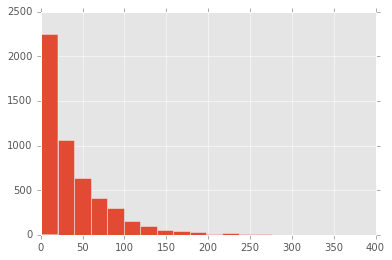

In [6]:
plt.hist([len(record['history']) for record in records.values() if len(record['history'])!=0],bins=20)

In [7]:
ids=df['id']

In [8]:
def borrow_count(_id):
    _id=str(_id)
    if _id in records and records[_id]['type'] in ['multiple','null','onepage']:
        return len([his for his in records[_id]['history'] if his['type']=='借书'])
    else:
        return np.NaN

borrow_count(df['id'][0])

38

In [9]:
df['borrow']=df['id'].map(borrow_count)

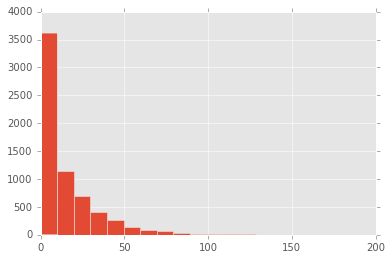

In [10]:
df['borrow'].hist(bins=20)

In [11]:
df['borrow'].dropna().groupby(df['school']).mean()



school
体育学院          7.662577
信息技术学院        7.976812
化学与材料科学学院    15.887640
历史文化与旅游学院    27.088561
商学院          11.836806
国际教育学院       24.625000
地理与资源科学学院    19.845238
外国语学院        22.608696
工学院          10.873529
政治教育学院       28.101010
教育科学学院       22.793722
数字媒体学院       16.957237
数学与软件科学学院    10.619171
文学院          31.666667
新闻与传播学院      15.345098
服装学院          8.083333
法学院          18.912281
物理与电子工程学院     9.819307
生命科学学院       19.804979
经济与管理学院      13.339041
美术学院         15.037705
舞蹈学院          4.727273
计算机科学学院      14.320896
音乐学院          3.093583
Name: borrow, dtype: float64

In [12]:
df['borrow'].dropna().groupby(df['sex']).mean()

sex
0    17.430650
1     8.558081
Name: borrow, dtype: float64

In [13]:
sex_group=df['borrow'].dropna().groupby(df['sex'])

In [14]:
sex_group.describe()

sex       
0    count    4535.000000
     mean       17.430650
     std        20.693799
     min         0.000000
     25%         2.000000
     50%        11.000000
     75%        25.000000
     max       198.000000
1    count    1980.000000
     mean        8.558081
     std        15.742726
     min         0.000000
     25%         0.000000
     50%         2.000000
     75%        10.000000
     max       179.000000
dtype: float64

In [15]:
borrow_mean=df['borrow'].dropna().groupby(df['school']).mean()


In [16]:
borrow_mean.sort_values()

school
音乐学院          3.093583
舞蹈学院          4.727273
体育学院          7.662577
信息技术学院        7.976812
服装学院          8.083333
物理与电子工程学院     9.819307
数学与软件科学学院    10.619171
工学院          10.873529
商学院          11.836806
经济与管理学院      13.339041
计算机科学学院      14.320896
美术学院         15.037705
新闻与传播学院      15.345098
化学与材料科学学院    15.887640
数字媒体学院       16.957237
法学院          18.912281
生命科学学院       19.804979
地理与资源科学学院    19.845238
外国语学院        22.608696
教育科学学院       22.793722
国际教育学院       24.625000
历史文化与旅游学院    27.088561
政治教育学院       28.101010
文学院          31.666667
Name: borrow, dtype: float64

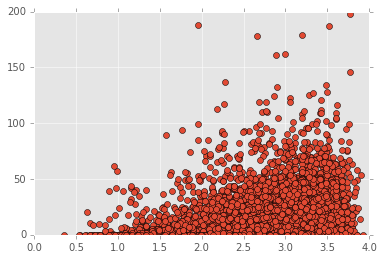

In [17]:
plt.plot(df['gpa'],df['borrow'],'o')

In [18]:
majar_mean=df['borrow'].dropna().groupby(df['majar']).mean()

In [19]:
for key,value in majar_mean.sort_values().items():
    print(key,value)

服装与服饰设计 0.75
音乐表演(流行演唱) 1.41176470588
音乐表演 1.5
音乐学 2.97674418605
音乐表演(音乐剧) 3.24137931034
音乐表演(声乐) 3.78082191781
广播电视编导 4.30769230769
舞蹈表演 4.31196581197
播音与主持艺术 4.52631578947
编导 4.60606060606
会计与审计 4.76
音乐表演(器乐) 4.84782608696
俄语 5.22222222222
体育教育 5.30508474576
舞蹈学 5.40983606557
通信工程(高端技术技能型本科) 6.08571428571
广告设计与制作 6.27906976744
舞蹈学(音乐舞蹈) 6.34426229508
服装设计 6.66666666667
电气工程及其自动化 7.22988505747
安全工程 7.95348837209
金融工程 8.0985915493
信息与计算科学 8.21518987342
通信工程 8.50909090909
戏剧影视导演 8.73913043478
环境工程 9.24742268041
会计学 9.32530120482
工业工程 9.38095238095
音乐学(电脑音乐制作) 9.47368421053
电子信息工程 9.66379310345
工商管理 10.1176470588
服装设计与工程 10.3333333333
工业设计 11.0
绘画 11.2765957447
审计学 11.3191489362
统计学 11.4305555556
自然地理与资源环境 11.4482758621
公共事业管理 11.59375
物理学 11.8671328671
数学与应用数学 12.1907894737
生物技术 12.2121212121
财务管理 12.4545454545
材料化学 12.6153846154
工程造价 12.676300578
网络工程 12.8157894737
影视动画 12.9268292683
视觉传达设计 12.9907834101
软件工程 13.2790697674
计算机科学与技术 13.4942528736
广告学 13.625
环境设计 13.6459854015
市场营销 13.83

In [20]:
df[(df['borrow']>0) & (df['school']=='数学与软件科学学院')]

,ID,id,level,master,money,name,sex,statue,support,gpa,school,majar,class,size,borrow
82,130602199608091840,2014060519,1,2014级本科数学与软件科学学院信息与计算科学,NaN,刘海薇,0,正常卡,0 /元,1.20,数学与软件科学学院,信息与计算科学,理工,495,10.0
102,130682199508017063,2014060705,1,2014级本科数学与软件科学学院统计学,NaN,陈雅文,0,正常卡,0 /元,2.94,数学与软件科学学院,统计学,理工,495,7.0
109,130803199506060047,2014060533,1,2014级本科数学与软件科学学院信息与计算科学,NaN,王冉,0,正常卡,0 /元,0.77,数学与软件科学学院,信息与计算科学,理工,495,10.0
165,140203199509092625,2014060736,1,2014级本科数学与软件科学学院统计学,NaN,杨静,0,正常卡,0 /元,3.64,数学与软件科学学院,统计学,理工,495,7.0
217,141122199609040042,2014060522,1,2014级本科数学与软件科学学院信息与计算科学,NaN,马昕娣,0,正常卡,0 /元,3.50,数学与软件科学学院,信息与计算科学,理工,495,12.0
274,142701199601155445,2014060633,1,2014级本科数学与软件科学学院信息与计算科学,NaN,薛小婷,0,正常卡,0 /元,3.43,数学与软件科学学院,信息与计算科学,理工,495,19.0
304,150203199601080629,2014060610,1,2014级本科数学与软件科学学院信息与计算科学,NaN,解嘉曦,0,正常卡,0 /元,1.54,数学与软件科学学院,信息与计算科学,普通理科,495,6.0
373,210304199510242627,2014060816,1,2014级本科数学与软件科学学院统计学,NaN,孟诗慧,0,正常卡,0 /元,2.47,数学与软件科学学院,统计学,理工,495,9.0
407,220106199504168225,2014060530,1,2014级本科数学与软件科学学院信息与计算科学,NaN,屠小骄,0,正常卡,0 /元,1.59,数学与软件科学学院,信息与计算科学,理工,495,3.0
448,230306199501214225,2014060727,1,2014级本科数学与软件科学学院统计学,NaN,孙玉平,0,正常卡,0 /元,2.69,数学与软件科学学院,统计学,理工,495,11.0


In [21]:
def most_common(key,limit=10):
    history_l=[]

    for _,value in df[(df['borrow']>0) & (df['school']==key)]['id'].items(): # remark & operator you can not use "and "
        _id=str(value)
        history_l.append([his['name'] for his in records[_id]['history'] if his['type']=='借书'])

    counter=Counter(chain(*history_l))
    return counter.most_common(limit)

In [22]:
for name,count in most_common('外国语学院',limit=10):
    print(name,count)

圣经故事 13
新日本语能力测试N1词汇必备 8
野性的呼唤 7
新日本语能力考试N1文法 (详解+练习) 7
傲慢与偏见 7
格列佛游记 6
儿子与情人 6
查特莱夫人的情人:珍藏版 5
妞妞:一个父亲的札记 5
雾都孤儿 5
